In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn. linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import utils

In [ ]:
df = pd.read_csv('train.csv', index_col = 0)
df.sort_index(inplace= True)
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
id,,,,,,,,,,,,,
0,972,Dell,XPS 13,Ultrabook,13.3,Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1268.00
1,1085,Dell,Latitude 3570,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.06kg,481.98
2,1013,HP,EliteBook 840,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,2089.00


Transformamos los datos para que sean operables

In [17]:
df.describe()

,laptop_ID,Company,Inches,Ram,Weight,Price_euros,Total Resolution
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,9.120000e+02
mean,666.192982,958.352763,15.011404,8.188596,2.032112,1108.122873,2.164425e+06
std,384.873846,286.357099,1.411744,4.899827,0.653772,714.597741,1.431201e+06
min,1.000000,210.800000,10.100000,2.000000,0.690000,174.000000,1.049088e+06
25%,330.500000,899.000000,14.000000,4.000000,1.500000,589.000000,1.049088e+06
50%,673.500000,914.000000,15.600000,8.000000,2.040000,949.000000,2.073600e+06
75%,998.500000,949.000000,15.600000,8.000000,2.300000,1458.500000,2.073600e+06
max,1320.000000,3049.000000,18.400000,32.000000,4.600000,6099.000000,8.294400e+06


In [180]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 99.8+ KB


## Feature engenearing

### Conversión a numéricas

In [3]:
utils.clean_weight(df)
utils.clean_ram(df)
utils.extract_resolution(df)

diccionario_company = utils.diccionario_mediana(df, 'Company')
utils.mapeo_dicc(df,'Company', diccionario_company)

diccionario_producto = utils.diccionario_mediana(df, 'Product')
utils.mapeo_dicc(df,'Product', diccionario_producto)

diccionario_TypeName = utils.diccionario_mediana(df, 'TypeName')
utils.mapeo_dicc(df,'TypeName', diccionario_TypeName)

diccionario_Cpu = utils.diccionario_mediana(df, 'Cpu')
utils.mapeo_dicc(df,'Cpu', diccionario_Cpu)

diccionario_Memory = utils.diccionario_mediana(df, 'Memory')
utils.mapeo_dicc(df,'Memory', diccionario_Memory)

diccionario_Gpu = utils.diccionario_mediana(df, 'Gpu')
utils.mapeo_dicc(df,'Gpu', diccionario_Gpu)

diccionario_OpSys = utils.diccionario_mediana(df, 'OpSys')
utils.mapeo_dicc(df,'OpSys', diccionario_OpSys)

In [4]:
df

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Total Resolution
id,,,,,,,,,,,,,
0,972,1175.476570,1628.555000,1530.688148,13.3,1235.240588,8.0,1211.357235,1007.587536,1150.116461,1.30,1268.00,5760000.0
1,1085,1175.476570,481.980000,768.970575,15.6,698.038571,4.0,618.962000,1007.587536,1150.116461,2.06,481.98,1049088.0
2,1013,1042.357884,1370.684444,1530.688148,14.0,1309.382841,8.0,1867.280267,1110.536250,1150.116461,1.48,2089.00,2073600.0
3,891,1042.357884,1937.750000,1248.470471,13.3,929.851479,4.0,1211.357235,1110.536250,1150.116461,1.28,1700.00,2073600.0
4,1284,1042.357884,549.990000,768.970575,15.6,549.990000,6.0,823.854286,532.993333,1150.116461,2.04,549.99,2073600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1166,1042.357884,1490.005000,768.970575,15.6,1014.556078,8.0,1211.357235,1007.587536,1765.166875,1.88,1579.00,2073600.0
1298,473,644.774800,641.798000,768.970575,15.6,482.232553,4.0,618.962000,584.000000,1150.116461,2.20,469.00,1049088.0
1300,1111,1175.476570,831.714000,768.970575,15.6,929.851479,8.0,667.020067,885.563333,1150.116461,2.36,638.80,2073600.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    float64
 2   Product           912 non-null    float64
 3   TypeName          912 non-null    float64
 4   Inches            912 non-null    float64
 5   Cpu               912 non-null    float64
 6   Ram               912 non-null    float64
 7   Memory            912 non-null    float64
 8   Gpu               912 non-null    float64
 9   OpSys             912 non-null    float64
 10  Weight            912 non-null    float64
 11  Price_euros       912 non-null    float64
 12  Total Resolution  912 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 99.8 KB


## MODELO REGRESIÓN LINEAL

<Axes: >

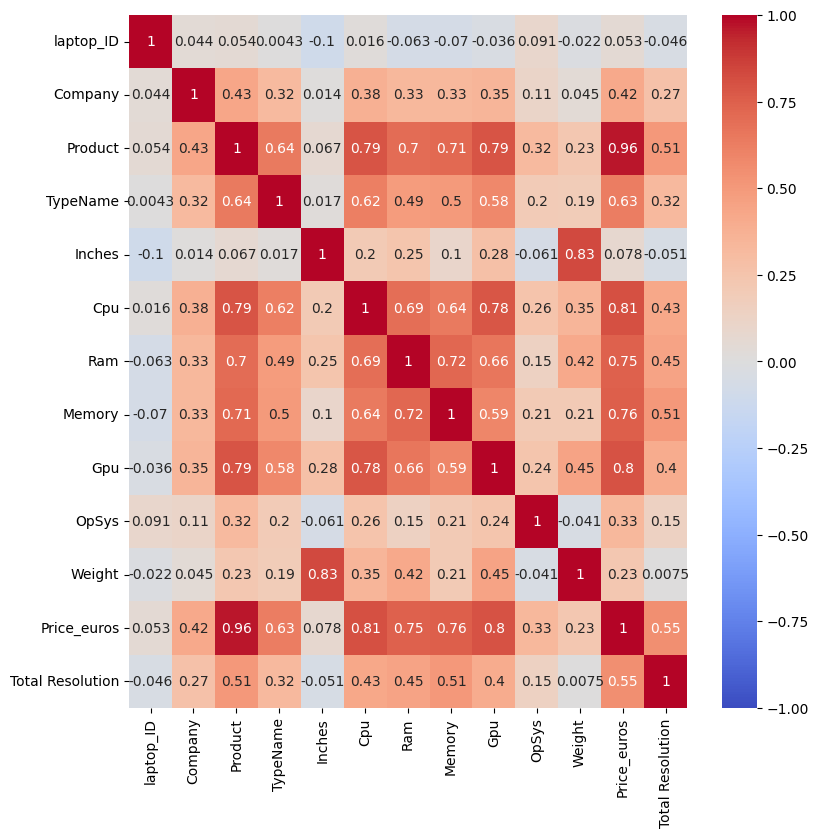

In [5]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(numeric_only= True), annot= True, vmin= -1, cmap="coolwarm")

Teniendo en cuenta la colinealidad posible y que tampoco queremos saturar al modelo y caer en sobrejuste, usaremos: 
Cpu
Inches
Gpu
Ram
Total Resolution
Company

In [6]:
X =df.drop(columns=['Price_euros','laptop_ID'])
Y = df["Price_euros"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state= 10)

In [63]:
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(912, 11)
(912,)
(729, 11)
(183, 11)
(729,)
(183,)


## Regularización

In [32]:
st_scaler = StandardScaler()
st_scaler.fit(x_train)
x_train_st_scall = st_scaler.transform(x_train)
x_test_st_scall = st_scaler.transform(x_test)

In [33]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)
x_train_mm_scall = mm_scaler.transform(x_train)
x_test_mm_scall = mm_scaler.transform(x_test)


Con el minmax

In [34]:
ln_2 = LinearRegression()
ln_2.fit(x_train_mm_scall, y_train)

pred_scal_mm = ln_2.predict(x_test_mm_scall)

print("MAE: ", mean_absolute_error(y_test, pred_scal_mm))
print("MSE: ", mean_squared_error(y_test, pred_scal_mm))

MAE:  100.41126512363313
MSE:  31997.193386679566


### Regresión polinomica

In [35]:
from sklearn.preprocessing import PolynomialFeatures

pol_reg = PolynomialFeatures(degree=1)
pol_reg.fit(x_train_mm_scall)
x_train_poly = pol_reg.transform(x_train_mm_scall)
x_test_poly = pol_reg.transform(x_test_mm_scall)


In [36]:
pol_reg_2 = LinearRegression()
pol_reg_2.fit(x_train_poly, y_train)

LinearRegression()

In [37]:
test_pred_poly = pol_reg_2.predict(x_test_poly)

In [38]:
print("MAE train", mean_absolute_error(y_test, test_pred_poly))
print("MSE train", mean_squared_error(y_test, test_pred_poly))

MAE train 100.41126512363307
MSE train 31997.193386679697


Probamos normalizacion

In [50]:
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train_poly, y_train)

pred_ridge = ridge.predict(x_test_poly)

print("MAE: ", mean_absolute_error(y_test, pred_ridge))
print("MSE: ", mean_squared_error(y_test, pred_ridge))

MAE:  100.53917814342466
MSE:  32006.54016047744


## COMPROBADO CON EL TEST

In [185]:
df.to_csv('df_limpio.csv')

In [51]:
pruebacsv = pd.read_csv('test.csv', index_col=0)
pruebacsv.sort_index(inplace= True)

In [73]:
pruebacsv.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,,
6,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg
8,393,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8GB,500GB HDD,AMD FirePro W5130M,Windows 10,2.23kg


In [52]:
utils.clean_weight(pruebacsv)
utils.clean_ram(pruebacsv)
utils.extract_resolution(pruebacsv)

utils.mapeo_dicc(pruebacsv,'Company', diccionario_company)

utils.mapeo_dicc(pruebacsv,'Product', diccionario_producto)

utils.mapeo_dicc(pruebacsv,'TypeName', diccionario_TypeName)

utils.mapeo_dicc(pruebacsv,'Cpu', diccionario_Cpu)

utils.mapeo_dicc(pruebacsv,'Memory', diccionario_Memory)

utils.mapeo_dicc(pruebacsv,'Gpu', diccionario_Gpu)

utils.mapeo_dicc(pruebacsv,'OpSys', diccionario_OpSys)

In [75]:
pruebacsv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 6 to 1299
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    float64
 2   Product           238 non-null    float64
 3   TypeName          391 non-null    float64
 4   Inches            391 non-null    float64
 5   Cpu               375 non-null    float64
 6   Ram               391 non-null    float64
 7   Memory            388 non-null    float64
 8   Gpu               363 non-null    float64
 9   OpSys             391 non-null    float64
 10  Weight            391 non-null    float64
 11  Total Resolution  391 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 39.7 KB


In [53]:
pruebacsv = pruebacsv.drop(columns='laptop_ID')

In [125]:
pruebacsv

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Total Resolution
id,,,,,,,,,,,
6,949.0,1008.52,689.0,15.6,1775.00,16.0,1099.000,1045.0,989.995,1.93,2073600.0
8,949.0,NaN,2239.0,15.6,NaN,8.0,516.315,NaN,989.995,2.23,2073600.0
14,963.0,NaN,1498.5,17.3,2749.99,64.0,2824.000,NaN,989.995,3.58,2073600.0
21,949.0,1984.00,2239.0,15.6,1667.00,8.0,1099.000,1984.0,989.995,2.06,2073600.0
22,963.0,NaN,269.0,11.6,299.00,2.0,275.000,299.0,989.995,1.10,1049088.0
...,...,...,...,...,...,...,...,...,...,...,...
1281,899.0,1079.00,1498.5,15.6,1667.00,8.0,1099.000,NaN,484.450,2.40,2073600.0
1285,914.0,726.00,689.0,13.3,1209.50,8.0,1099.000,966.5,989.995,1.49,2073600.0
1286,914.0,438.69,1495.0,15.6,1209.50,8.0,1099.000,966.5,989.995,1.84,2073600.0


In [2]:
pruebacsv.columns()

NameError: name 'pruebacsv' is not defined

In [54]:
pruebacsv = pruebacsv.fillna(pruebacsv.mean())

In [55]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(pruebacsv)
pruebacsv_scall = mm_scaler.transform(pruebacsv)

In [56]:
pruebacsv_scall_poly = pol_reg.transform(pruebacsv_scall)
# pruebacsv_scal_poly_pred = pol_reg_2.predict(pruebacsv_scall_poly)

In [58]:
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train_poly, y_train)
pruebacsv_scal_poly_pred = ridge.predict(pruebacsv_scall_poly)

In [59]:
df_final = pd.read_csv('sample_submission.csv', index_col = 0)

In [60]:
df_final.sort_index(inplace= True)

In [132]:
df_final.head(3)

,Price_euros
id,
6,1109.0
8,1090.0
14,1699.0


In [61]:
df_final['Price_euros'] = pruebacsv_scal_poly_pred

In [62]:
df_final.reset_index(inplace=True)

In [63]:
df_final

,id,Price_euros
0,6,1219.215837
1,8,1093.370949
2,14,1892.529112
3,21,1887.436826
4,22,861.652261
...,...,...
386,1281,1020.350168
387,1285,916.892348
388,1286,628.669893
389,1295,1043.716730


In [64]:
df_final.to_csv('Hugo-kaggle3.csv', index = False)

## Corrección del de Raúl

Limpieza:
<br>
Agrupar compañias y tipos de portatiles y sacar la mediana y añadirlo al DF
<br>
RAM y Weight simplemente saco las letras
<br>
Pixeles hizo lo mismo, el producto de píxeles.
<br>
Hizo un get dummies del tipo de pantalla
<br>
De la CPU: Pasó los GHz a float. La macra
<br>
Sistema operativo: Get dummies.
<br>
Hizo Selenium con GPU y CPU para sacar la potencia de cada uno de una web.
<br><br>
Para la correlación: uso solo variables que tuvieran más de 0.2 de corr.
<br>
Después de entrenar los modelos, hizo grid search y elastic net. Se quedaba en 222. Ya usó Xboost. Luego un cross validation.